#### Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# @title Figure Settings
import IPython.display as ipd
from matplotlib import gridspec

import ipywidgets as widgets  # interactive display
from ipywidgets import Label
%config InlineBackend.figure_format = 'retina'
# use NMA plot style
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")
my_layout = widgets.Layout()

In [4]:
# @title Plotting Functions

time = np.arange(0, 1, 0.01)

def plot_slope(dt):
  """
    Args:
      dt  : time-step
    Returns:
      A figure of an exponential, the slope of the exponential and the derivative exponential
  """

  t = np.arange(0, 5+0.1/2, 0.1)

  with plt.xkcd():

    fig = plt.figure(figsize=(6, 4))
    # Exponential
    p = np.exp(0.3*t)
    plt.plot(t, p, label='y')
    # slope
    plt.plot([1, 1+dt], [np.exp(0.3*1), np.exp(0.3*(1+dt))],':og',label=r'$\frac{y(1+\Delta t)-y(1)}{\Delta t}$')
    # derivative
    plt.plot([1, 1+dt], [np.exp(0.3*1), np.exp(0.3*(1))+dt*0.3*np.exp(0.3*(1))],'-k',label=r'$\frac{dy}{dt}$')
    plt.legend()
    plt.plot(1+dt, np.exp(0.3*(1+dt)), 'og')
    plt.ylabel('y')
    plt.xlabel('t')
    plt.show()



def plot_StepEuler(dt):
  """
    Args:
      dt  : time-step
    Returns:
      A figure of one step of the Euler method for an exponential growth function
  """

  t=np.arange(0, 1 + dt + 0.1 / 2, 0.1)

  with plt.xkcd():
    fig = plt.figure(figsize=(6,4))
    p=np.exp(0.3*t)
    plt.plot(t,p)
    plt.plot([1,],[np.exp(0.3*1)],'og',label='Known')
    plt.plot([1,1+dt],[np.exp(0.3*1),np.exp(0.3*(1))+dt*0.3*np.exp(0.3*1)],':g',label=r'Euler')
    plt.plot(1+dt,np.exp(0.3*(1))+dt*0.3*np.exp(0.3*1),'or',label=r'Estimate $p_1$')
    plt.plot(1+dt,p[-1],'bo',label=r'Exact $p(t_1)$')
    plt.vlines(1+dt,np.exp(0.3*(1))+dt*0.3*np.exp(0.3*1),p[-1],colors='r', linestyles='dashed',label=r'Error $e_1$')
    plt.text(1+dt+0.1,(np.exp(0.3*(1))+dt*0.3*np.exp(0.3*1)+p[-1])/2,r'$e_1$')
    plt.legend()
    plt.ylabel('Population (millions)')
    plt.xlabel('time(years)')
    plt.show()

def visualize_population_approx(t, p):
    fig = plt.figure(figsize=(6, 4))
    plt.plot(t, np.exp(0.3*t), 'k', label='Exact Solution')

    plt.plot(t, p,':o', label='Euler Estimate')
    plt.vlines(t, p, np.exp(0.3*t),
              colors='r', linestyles='dashed', label=r'Error $e_k$')

    plt.ylabel('Population (millions)')
    plt.legend()
    plt.xlabel('Time (years)')
    plt.show()

## LIF PLOT
def plot_IF(t, V, I, Spike_time):
  """
    Args:
      t  : time
      V  : membrane Voltage
      I  : Input
      Spike_time : Spike_times
    Returns:
      figure with three panels
      top panel: Input as a function of time
      middle panel: membrane potential as a function of time
      bottom panel: Raster plot
  """

  with plt.xkcd():
    fig = plt.figure(figsize=(12,4))
    gs = gridspec.GridSpec(3, 1,  height_ratios=[1, 4, 1])
    # PLOT OF INPUT
    plt.subplot(gs[0])
    plt.ylabel(r'$I_e(nA)$')
    plt.yticks(rotation=45)
    plt.plot(t,I,'g')
    #plt.ylim((2,4))
    plt.xlim((-50,1000))
    # PLOT OF ACTIVITY
    plt.subplot(gs[1])
    plt.plot(t,V,':')
    plt.xlim((-50,1000))
    plt.ylabel(r'$V(t)$(mV)')
    # PLOT OF SPIKES
    plt.subplot(gs[2])
    plt.ylabel(r'Spike')
    plt.yticks([])
    plt.scatter(Spike_time,1*np.ones(len(Spike_time)), color="grey", marker=".")
    plt.xlim((-50,1000))
    plt.xlabel('time(ms)')
    plt.show()

def plot_rErI(t, r_E, r_I):
  """
    Args:
      t   : time
      r_E : excitation rate
      r_I : inhibition rate

    Returns:
      figure of r_I and r_E as a function of time

  """
  with plt.xkcd():
    fig = plt.figure(figsize=(6,4))
    plt.plot(t,r_E,':',color='b',label=r'$r_E$')
    plt.plot(t,r_I,':',color='r',label=r'$r_I$')
    plt.xlabel('time(ms)')
    plt.legend()
    plt.ylabel('Firing Rate (Hz)')
    plt.show()


def plot_rErI_Simple(t, r_E, r_I):
  """
    Args:
      t   : time
      r_E : excitation rate
      r_I : inhibition rate

    Returns:
      figure with two panels
      left panel: r_I and r_E as a function of time
      right panel: r_I as a function of r_E with Nullclines

  """
  with plt.xkcd():
    fig = plt.figure(figsize=(12,4))
    gs = gridspec.GridSpec(1, 2)
    # LEFT PANEL
    plt.subplot(gs[0])
    plt.plot(t,r_E,':',color='b',label=r'$r_E$')
    plt.plot(t,r_I,':',color='r',label=r'$r_I$')
    plt.xlabel('time(ms)')
    plt.legend()
    plt.ylabel('Firing Rate (Hz)')
    # RIGHT PANEL
    plt.subplot(gs[1])
    plt.plot(r_E,r_I,'k:')
    plt.plot(r_E[0],r_I[0],'go')

    plt.hlines(0,np.min(r_E),np.max(r_E),linestyles="dashed",color='b',label=r'$\frac{d}{dt}r_E=0$')
    plt.vlines(0,np.min(r_I),np.max(r_I),linestyles="dashed",color='r',label=r'$\frac{d}{dt}r_I=0$')

    plt.legend(loc='upper left')

    plt.xlabel(r'$r_E$')
    plt.ylabel(r'$r_I$')
    plt.show()

def plot_rErI_Matrix(t, r_E, r_I, Null_rE, Null_rI):
  """
    Args:
      t   : time
      r_E : excitation firing rate
      r_I : inhibition firing rate
      Null_rE: Nullclines excitation firing rate
      Null_rI: Nullclines inhibition firing rate
    Returns:
      figure with two panels
      left panel: r_I and r_E as a function of time
      right panel: r_I as a function of r_E with Nullclines

  """

  with plt.xkcd():
    fig = plt.figure(figsize=(12,4))
    gs = gridspec.GridSpec(1, 2)
    plt.subplot(gs[0])
    plt.plot(t,r_E,':',color='b',label=r'$r_E$')
    plt.plot(t,r_I,':',color='r',label=r'$r_I$')
    plt.xlabel('time(ms)')
    plt.ylabel('Firing Rate (Hz)')
    plt.legend()
    plt.subplot(gs[1])
    plt.plot(r_E,r_I,'k:')
    plt.plot(r_E[0],r_I[0],'go')

    plt.plot(r_E,Null_rE,':',color='b',label=r'$\frac{d}{dt}r_E=0$')
    plt.plot(r_E,Null_rI,':',color='r',label=r'$\frac{d}{dt}r_I=0$')
    plt.legend(loc='best')
    plt.xlabel(r'$r_E$')
    plt.ylabel(r'$r_I$')
    plt.show()

#### Coding Exercise 1.3: Step, step, step

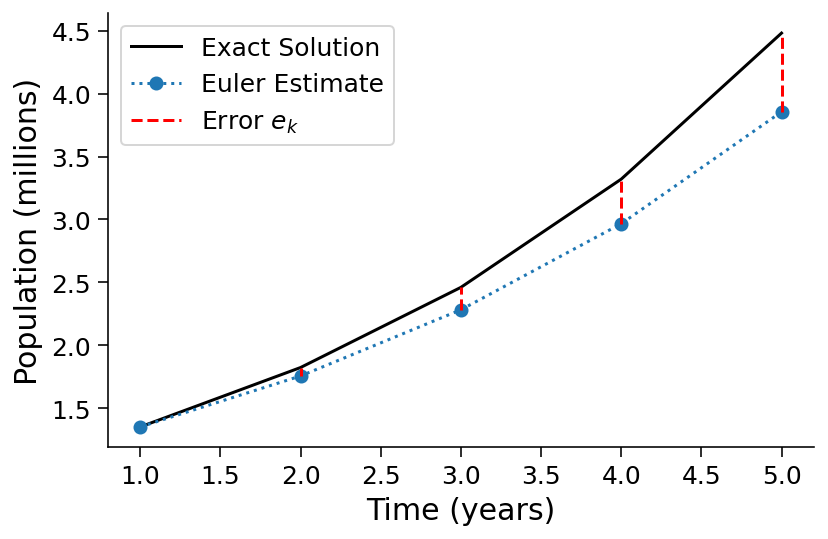

In [16]:
# Time step
dt = 1

# Make time range from 1 to 5 years with step size dt
t = np.arange(1, 5 + dt, dt)

# Get number of steps
n = len(t)

# Intialize p array
p = np.zeros(n)
p[0] = np.exp(0.3*t[0])   # Initial Condition

# Loop over steps
for k in range(n-1):
    # Calculate the population step
    p[k+1] = p[k] + dt * 0.3 * p[k]


# Visualize
visualize_population_approx(t,p)

#### Coding Exercise 2: LIF and Euler

In [ ]:
def Euler_Integrate_and_Fire(I, time, dt):
    """
    Args:
        I: Input
        time: time
        dt: time-step
    Returns:
        Spike: Spike count
        Spike_time: Spike times
        V: membrane potential esitmated by the Euler method
    """


    Spike = 0
    tau_m = 10
    R_m = 10
    t_isi = 0
    V_reset = E_L = -75
    n = len(time)
    V = V_reset * np.ones(n)
    V_th = -50
    Spike_time = []

    for k in range(n-1):
        
